# Step 1: Import libraries and load in data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
datafile = "data/Ames_Housing_Data.tsv"

In [4]:
df = pd.read_csv(datafile, sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df.shape

(2930, 82)

In [6]:
df.dtypes.value_counts() # 43 columns of categorical data, 39 columns of numeric data

object     43
int64      28
float64    11
dtype: int64

In [7]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Exploratory Data Analysis

Here we will look at the different columns and take action. Some actions include removing columns with too much missing data, converting categorical data to numeric, attempting to fix skewed data, and creating visuals

In [8]:
dropped_columns = ['Pool QC', 'Fence', 'Misc Feature', 'Alley'] # Dropping columns that have too many null values
df = df.drop(columns=dropped_columns)

In [9]:
df.shape

(2930, 78)

In [13]:
df['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

String type columns are listed as object types in a pandas dataframe. In order to run linear regression using features that are categorical, you will need to convert them to a numeric type. This is done through various methods such as pandas get dummies which creates a new column for each category within a column. For example, in the cell above, we see that the Roof Style column has 6 categories. Running get_dummies will create 6 columns representing each category. The values will be 0 for each new column except for the one representing that row of data.

In [20]:
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm
Condition 2,Norm,Norm,Norm,Norm,Norm


we use **drop_first = True** to tackle the multicollinearity problem. For example, looking at the Roof Style example from above, we know that if 5 of the columns are labeled 0 then that row had the last remaining Roof Style since there were 6 categories in the original column. [0,0,0,0,0], [0,0,0,0,1], [0,0,0,1,0], [0,0,1,0,0], [0,1,0,0,0], [1,0,0,0,0] --> each of these represents one of roof styles and you only need 5 values to represent them. 

In [21]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2930.0,4.095563e-03,6.387630e-02,0.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00
Sale Condition_Alloca,2930.0,8.191126e-03,9.014880e-02,0.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00
Sale Condition_Family,2930.0,1.569966e-02,1.243320e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00
Sale Condition_Normal,2930.0,8.235495e-01,3.812681e-01,0.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00


# Taking a look at skewed columns

Skewness is a measure of asymmetry of a distribution of data. As you may know, there are 4 assumptions of Linear Regression
1. A linear relationship between the features and the target
2. Independence of your variables
3. Homoscedasticity or the idea that your residuals (errors) have a constant variance for different levels of x
4. The residuals of your model should be normally distributed

When you have skewed data, your model will be prone to outlier data and thus be less robust. You also want to tackle skewed data in order to to satisfy the homogeneity of variances assumption for the errors and to linearize the fit as much as possible as the name of the model suggests.

Generally, a skew level close to 0 means your data is okay and greater than 1 or less than -1 means your data is very skewed. To tackle this problem, we will be looking at the skew values of our numeric columns and filtering for highly skewed columns

In [23]:
# Create a list of float colums to check for skewing
mask = df.dtypes == np.float
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [25]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BsmtFin SF 2,4.139978
Bsmt Half Bath,3.940795
Mas Vnr Area,2.606985
Lot Frontage,1.499067
BsmtFin SF 1,1.416182
Total Bsmt SF,1.156204
Bsmt Unf SF,0.923053


### Visualizing the affects of data transformation

Below, we will be looking at the affects of applying a log transformation on a skewed column. You will see that the after np.log1p application, the distribution is much closer to following a gaussian distribution.

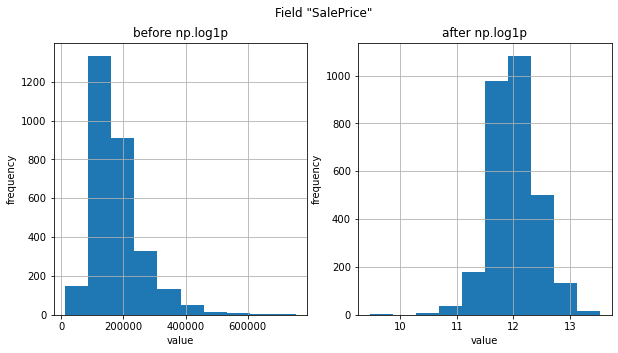

In [26]:
field = "SalePrice"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));